In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [73]:
import os
folder_path=r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\가상자산\가상자산_2023"

file_list=os.listdir(folder_path)

In [74]:
len(file_list)

16

In [75]:
import pandas as pd
a=pd.read_csv(folder_path+'/'+file_list[0])

In [76]:
for i, c in enumerate(file_list[1:]):
    if c.endswith('.csv'):
        print(i,c)
        a = pd.concat([a, pd.read_csv(os.path.join(folder_path, c))])


0 가상자산_20230118_20230207.csv
1 가상자산_20230208_20230226.csv
2 가상자산_20230227_20230316.csv
3 가상자산_20230317_20230403.csv
4 가상자산_20230404_20230420.csv
5 가상자산_20230421_20230508.csv
6 가상자산_20230509_20230513.csv
7 가상자산_20230514_20230517.csv
8 가상자산_20230518_20230524.csv
9 가상자산_20230525_20230603.csv
10 가상자산_20230604_20230618.csv
11 가상자산_20230619_20230704.csv
12 가상자산_20230705_20230723.csv
13 가상자산_20230724_20230808.csv
14 가상자산_20230809_20230830.csv


In [77]:
a

,date,time,title,content,press,link
0,2023.01.01,NaN,비트코인과 이더리움 안정적 흐름..새해에도 차분하게 시장 잘 살펴야..다복과...,NaN,매일안전신문,http://peoplesafe.kr
1,2023.01.01,NaN,"2023년 계묘년 '검은 토끼의 해'가 밝았습니다...""새해 복 많이 받으세요""",NaN,인사이트,http://www.insight.co.kr
2,2023.01.01,NaN,"2023년 비트코인, 어떨까?",NaN,이코노믹리뷰,http://www.econovill.com/
3,2023.01.01,NaN,[아듀2022 ②] 머지부터 FTX 파산까지...올해의 주요 이슈 TOP 10,NaN,토큰포스트,https://www.tokenpost.kr
4,2023.01.01,NaN,2023년 새해부터 달라지는 세금‧금융‧부동산 제도,NaN,조세금융신문,http://www.tfnews.co.kr/
...,...,...,...,...,...,...
3668,2023.08.30,NaN,상반기 금융사 '의심거래 보고' 증가…증권사 증가율 '톱',NaN,신아일보,http://www.shinailbo.co.kr/
3669,2023.08.30,2023-08-30 11:44:03,"[뉴스포커스] 윤대통령, 연일 '이념' 강조…'홍범도 흉상' 두고 논쟁 가열",\n\t\t\t&lt;출연 : 최수영 시사평론가·김성완 시사평론가&gt;윤석열 대통...,연합뉴스TV,https://n.news.naver.com/mnews/article/422/000...
3670,2023.08.30,NaN,커지는 자금세탁 우려…금융사 '의심 거래(STR)' 증가,NaN,금융소비자뉴스,http://newsfc.co.kr/
3671,2023.08.30,NaN,민관 함께 2조 규모 '스타트업 코리아 펀드' 조성…한국인 해외 창업도 지원한...,NaN,이투데이,http://www.etoday.co.kr


In [78]:
len(a)

60783

In [79]:
a['date'] = pd.to_datetime(a['date'])
sorted_df = a.sort_values(by='date', ascending=True)
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [80]:
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [81]:
sorted_df.to_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\가상자산\가상자산_2023.csv')

In [82]:
print(2023)
print('전체갯수',len(sorted_df))
print('기사내용 있는 것',len(sorted_df[sorted_df['content'].notna()]))

2023
전체갯수 60783
기사내용 있는 것 28325


In [71]:
sorted_df

,date,time,title,content,press,link
0,2022-01-01,NaN,"비트코인 4만8000달러 반등, 1시간 동안 1500달러 급등",NaN,글로벌이코노믹,http://www.g-enews.com/
1,2022-01-01,NaN,[인포그래픽 뉴스/업비트] 숫자로 보는 오늘의 비트·알트코인 (1월 1일),NaN,코인리더스,http://coinreaders.com
2,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
3,2022-01-01,NaN,[전망] 초개인화 사회! 2022년을 관통할 패션 비즈니스 트렌드 키워드 10,NaN,패션엔,http://www.fashionn.com
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
55305,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
55306,2022-12-31,NaN,[아듀2022] 암호화폐 시장 흔든 '폭풍의 눈'...올해의 인물 누굴까,NaN,토큰포스트,https://www.tokenpost.kr
55307,2022-12-31,2022-12-31 10:21:03,"FTX 창업자 뱅크먼-프리드, 다음주 재판서 무죄 주장할 듯",\r\n기사내용 요약사기·돈세탁 8개 혐의로 기소…유죄시 115년형\r\n\r\n\...,뉴시스,https://n.news.naver.com/mnews/article/003/001...
55308,2022-12-31,NaN,도지코인도 PoS로 전환? 관련 루머 속 가격 하락,NaN,디지털투데이,http://www.digitaltoday.co.kr/


In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\비트코인\비트코인_2022.csv", index_col=0)
df

,date,time,title,content,press,link
0,2022-01-01,NaN,"테슬라, 중국서도 20만대 리콜로 하락...뉴욕증시, 오미크론 확산에 약세로 마...",NaN,글로벌경제,http://www.getnews.co.kr
1,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
2,2022-01-01,NaN,"[업비트 급등주]시빅·스토리지·스팀달러·베이직어텐션토큰·어거, 뭐길래?",NaN,핀포인트뉴스,http://www.pinpointnews.co.kr
3,2022-01-01,NaN,"두나무 코인 시장 공포탐욕 지수 44.43, '중립' 단계…비트코인은 '중립' 단계...",NaN,톱스타뉴스,http://www.TopStarNews.Net
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
56171,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
56172,2022-12-31,2022-12-31 09:49:02,"""부동산도 주식도 폭락""…2022년 재테크 수익률 1위는?","\n1년 수익률은 달러, 금, 원자재 순올해 재테크 수단 가운데 달러가 가장 높은 ...",한국경제언론사 선정,https://n.news.naver.com/mnews/article/015/000...
56173,2022-12-31,NaN,올해 재테크 수익률 꼴찌는 비트코인...1위는?,NaN,청년일보,http://www.youthdaily.co.kr/
56174,2022-12-31,2022-12-31 09:36:01,올해 재테크 수익률 1위는 달러…상승·하락 상품은,\n\t\t\t올해 재테크 수단 중 가장 높은 수익률을 올린 것은 달러다. 31일 ...,국제신문언론사 선정,https://n.news.naver.com/mnews/article/658/000...


In [3]:
df = df.rename(columns={'dates': 'date'})

# Reorder the columns
df = df[['date', 'time', 'title', 'content', 'press', 'link']]
df

,date,time,title,content,press,link
0,2022-01-01,NaN,"테슬라, 중국서도 20만대 리콜로 하락...뉴욕증시, 오미크론 확산에 약세로 마...",NaN,글로벌경제,http://www.getnews.co.kr
1,2022-01-01,2022-01-01 10:46:02,"비트코인, 새해 첫날에도 부진…5700만 원선 거래",\n\n\n\n\n1일 오전 10시 10분 기준 국내 가상자산 거래소 빗썸에서 비트...,더팩트,https://n.news.naver.com/mnews/article/629/000...
2,2022-01-01,NaN,"[업비트 급등주]시빅·스토리지·스팀달러·베이직어텐션토큰·어거, 뭐길래?",NaN,핀포인트뉴스,http://www.pinpointnews.co.kr
3,2022-01-01,NaN,"두나무 코인 시장 공포탐욕 지수 44.43, '중립' 단계…비트코인은 '중립' 단계...",NaN,톱스타뉴스,http://www.TopStarNews.Net
4,2022-01-01,2022-01-01 12:21:01,"4만% 올랐다…비트코인 주춤, 알트코인 뜬다",\n새해에도 비트코인 반등 없이 하락세작년에 게임·메타버스 알트코인 급등올해 코인 ...,이데일리언론사 선정,https://n.news.naver.com/mnews/article/018/000...
...,...,...,...,...,...,...
56171,2022-12-31,NaN,암호업계 '2022년 인물'…최악 얼룩진 '악동'들의 경연장,NaN,코인데스크코리아,https://www.coindeskkorea.com/
56172,2022-12-31,2022-12-31 09:49:02,"""부동산도 주식도 폭락""…2022년 재테크 수익률 1위는?","\n1년 수익률은 달러, 금, 원자재 순올해 재테크 수단 가운데 달러가 가장 높은 ...",한국경제언론사 선정,https://n.news.naver.com/mnews/article/015/000...
56173,2022-12-31,NaN,올해 재테크 수익률 꼴찌는 비트코인...1위는?,NaN,청년일보,http://www.youthdaily.co.kr/
56174,2022-12-31,2022-12-31 09:36:01,올해 재테크 수익률 1위는 달러…상승·하락 상품은,\n\t\t\t올해 재테크 수단 중 가장 높은 수익률을 올린 것은 달러다. 31일 ...,국제신문언론사 선정,https://n.news.naver.com/mnews/article/658/000...


In [4]:
df.to_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\비트코인\비트코인_2022.csv')

In [7]:
print('전체갯수',len(df))
print('기사내용 있는 것',len(df[df['content'].notna()]))

전체갯수 56176
기사내용 있는 것 20639


In [ ]:
desired_columns_order = ['date', 'time', 'title', 'content', 'press', 'link']
df = df[desired_columns_order]

In [15]:
folder_path=r"C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\naver_news_data\암호화폐"

file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [16]:
file_list

['암호화폐_2017.csv',
 '암호화폐_2018.csv',
 '암호화폐_2019.csv',
 '암호화폐_2020.csv',
 '암호화폐_2021.csv',
 '암호화폐_2022.csv',
 '암호화폐_2023.csv']

In [17]:
a=pd.read_csv(folder_path+'/'+file_list[0])
for i, c in enumerate(file_list[1:]):
    if c.endswith('.csv'):
        print(i,c)
        a = pd.concat([a, pd.read_csv(os.path.join(folder_path, c))])

0 암호화폐_2018.csv
1 암호화폐_2019.csv
2 암호화폐_2020.csv
3 암호화폐_2021.csv
4 암호화폐_2022.csv
5 암호화폐_2023.csv


In [14]:
va = a.iloc[:, 1:7]


In [18]:
cc = a.iloc[:, 1:7]

In [10]:
bc = a.iloc[:, 1:7]

In [1]:
df

NameError: name 'df' is not defined

In [19]:
df = pd.concat([va, cc, bc], ignore_index=True)
df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 07:02:03,"2017년 주식 투자…IT, 인프라 ‘솔깃’ 해외주식도 담아보자",\n\t\t\t[헤럴드경제=김지헌 기자] 올해도 지루한 박스피(박스권에 갇힌 코스피...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...
2,2017-01-01,NaN,"[신년사] 이동걸 산업은행 회장 ""정책금융 본연 역할 충실 수행""",NaN,한국금융신문,http://www.fntimes.com
3,2017-01-01,NaN,미국·독일에서 엿보는 ‘스마트 팩토리’ 전략,NaN,이코노믹리뷰,http://www.econovill.com/
4,2017-01-01,NaN,[달라지는 금융제도] 잔금대출때 소득증명 의무화…저축성보험 납입기간 후 원...,NaN,금강일보,http://www.ggilbo.com
...,...,...,...,...,...,...
1320213,2023-08-23,NaN,"[토큰포스트 오후 브리핑] 비트코인 초기 개발자, 비트코인 네트워크에 '드라...",NaN,토큰포스트,https://www.tokenpost.kr
1320214,2023-08-23,NaN,"마크 큐반 ”오픈씨, 로열티 시스템 폐지는 큰 실수”",NaN,코인리더스,http://coinreaders.com
1320215,2023-08-23,2023.08.23. 오전 10:45,"'소옆경2' 김래원이 체포해야 할 최종 빌런, '덱스'는 누구인가",\n \n[SBS연예뉴스 | 강선애 기자] '소방서 옆 경찰서 그리고 국과수'의 최...,SBS연예뉴스,https://n.news.naver.com/mnews/article/416/000...
1320216,2023-08-23,NaN,"[토큰포스트 뉴욕 브리핑] 비트코인 초기 개발자, BTC 사이드체인 도입 제안 ...",NaN,토큰포스트,https://www.tokenpost.kr


In [20]:
sorted_df = df.sort_values(by='date', ascending=True)
sorted_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
sorted_df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...
3,2017-01-01,NaN,[2017 신년특집] 세계 금융의 대변화-화폐없는 시대가 온다 디지털 가상화폐 ...,NaN,울산매일신문,http://www.iusm.co.kr
4,2017-01-01,NaN,"[아시아 밀레니얼이 미래다] 게으른 나르시스트, 신 경제 창조하는 이 시대의...",NaN,아시아투데이,http://www.asiatoday.co.kr
...,...,...,...,...,...,...
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...
906573,2023-08-30,2023-08-30 06:20:57,국회 윤리특위 오늘 김남국 징계 수위 결정,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[뉴스투데이]국회 윤리특별위원...,MBC언론사 선정,https://n.news.naver.com/mnews/article/214/000...


In [21]:
print('전체갯수',len(sorted_df))
print('기사내용 있는 것',len(sorted_df[sorted_df['content'].notna()]))

전체갯수 906575
기사내용 있는 것 317335


In [1]:
sorted_df.to_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\naver_news_data.csv')

NameError: name 'sorted_df' is not defined

In [23]:
df = pd.read_csv('', index_col=0)

# 통합데이터 전처리

In [2]:
df = pd.read_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\naver_news_data.csv', index_col=0)
df

,date,time,title,content,press,link
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...
3,2017-01-01,NaN,[2017 신년특집] 세계 금융의 대변화-화폐없는 시대가 온다 디지털 가상화폐 ...,NaN,울산매일신문,http://www.iusm.co.kr
4,2017-01-01,NaN,"[아시아 밀레니얼이 미래다] 게으른 나르시스트, 신 경제 창조하는 이 시대의...",NaN,아시아투데이,http://www.asiatoday.co.kr
...,...,...,...,...,...,...
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...
906573,2023-08-30,2023-08-30 06:20:57,국회 윤리특위 오늘 김남국 징계 수위 결정,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[뉴스투데이]국회 윤리특별위원...,MBC언론사 선정,https://n.news.naver.com/mnews/article/214/000...


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 'year' 열로 그룹화하고 카운트
yearly_counts = df.groupby('year').size()

yearly_counts

year
2017     34478
2018    192624
2019    229493
2020     65457
2021    146787
2022    151250
2023     86486
dtype: int64

In [4]:
# 'content' 열이 비어있지 않은 행만 필터링
non_empty_content = df[df['content'].notnull()]

# 필터링된 결과를 년도별로 그룹화하고 카운트
yearly_counts_non_empty = non_empty_content.groupby('year').size()

yearly_counts_non_empty

year
2017    15535
2018    72445
2019    38508
2020    23876
2021    66870
2022    61821
2023    38280
dtype: int64

### content(본문) 있는 행만 남기기

In [5]:
# 'content' 열이 비어있지 않은 행만 필터링
non_empty_content_datewise = df[df['content'].notnull()]
non_empty_content_datewise

,date,time,title,content,press,link,year
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2017
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2017
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,2017
5,2017-01-01,2017-01-01 12:03:13,[2017 국제 핫이슈]블록체인 기술 확산,\n\t\t\t블록체인은 `제2의 인터넷` `넥스트 인터넷`으로 불린다. 새해에는 ...,전자신문,https://n.news.naver.com/mnews/article/030/000...,2017
6,2017-01-01,2017-01-01 10:33:04,5대 키워드로 보는 2016년 핀테크 트렌드,\n\t\t\t2016년 한 해 동안 다양한 핀테크 얘기가 쏟아졌다. IT 기업부터...,블로터,https://n.news.naver.com/mnews/article/293/000...,2017
...,...,...,...,...,...,...,...
906568,2023-08-30,2023-08-30 06:43:01,"美법원, SEC에 비트코인 현물ETF 반려 결정 재고하라고 지시…비트코인 가격 ...",\n\n\n\n\n[로이터][헤럴드경제=김우영 기자] 미 연방법원이 비트코인 현물 ...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...,2023
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...,2023
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...,2023
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,2023


### 관련 없는 행 제거

In [6]:
filtered_df = non_empty_content_datewise[
    ~non_empty_content_datewise['content'].str.contains('라이온봇|화폐에 대한 모든 것!', na=False)
]
removed_df = non_empty_content_datewise[
    non_empty_content_datewise['content'].str.contains('라이온봇|화폐에 대한 모든 것!', na=False)
]

print(len(non_empty_content_datewise))
print(len(filtered_df))
print(len(removed_df))

filtered_df

317335
259994
57341


,date,time,title,content,press,link,year
0,2017-01-01,2017-01-01 07:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,\n\n\n\n\n© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2017
1,2017-01-01,2017-01-01 15:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",\n【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다.\n ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2017
2,2017-01-01,2017-01-01 16:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",\n\t\t\t“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,2017
5,2017-01-01,2017-01-01 12:03:13,[2017 국제 핫이슈]블록체인 기술 확산,\n\t\t\t블록체인은 `제2의 인터넷` `넥스트 인터넷`으로 불린다. 새해에는 ...,전자신문,https://n.news.naver.com/mnews/article/030/000...,2017
6,2017-01-01,2017-01-01 10:33:04,5대 키워드로 보는 2016년 핀테크 트렌드,\n\t\t\t2016년 한 해 동안 다양한 핀테크 얘기가 쏟아졌다. IT 기업부터...,블로터,https://n.news.naver.com/mnews/article/293/000...,2017
...,...,...,...,...,...,...,...
906568,2023-08-30,2023-08-30 06:43:01,"美법원, SEC에 비트코인 현물ETF 반려 결정 재고하라고 지시…비트코인 가격 ...",\n\n\n\n\n[로이터][헤럴드경제=김우영 기자] 미 연방법원이 비트코인 현물 ...,헤럴드경제,https://n.news.naver.com/mnews/article/016/000...,2023
906570,2023-08-30,2023-08-30 06:30:00,갈수록 줄어드는 스테이블코인 유통량…가상자산 가격도 횡보,\n스테이블코인 유통량 증가하면 가상자산 가격도 올라이변 없었던 잭슨홀 미팅 호재에...,6면 1단,https://n.news.naver.com/mnews/article/277/000...,2023
906571,2023-08-30,2023-08-30 06:54:01,"[이충재의 인사이트] 김남국 징계 계기, 국회의원 '정직 6개월' 두자",\n'30일내 출석정지'와 '제명' 간 차이 커 실효성 논란...윤리특위 징계 유명...,오마이뉴스언론사 선정,https://n.news.naver.com/mnews/article/047/000...,2023
906572,2023-08-30,2023-08-30 06:11:00,오늘 김남국 제명안 표결···'숙고의 시간' 거친 민주당 선택은,\n[the300]\n\n\n\n(서울=뉴스1) 임세영 기자 = 김남국 무소속 의원...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,2023


In [7]:
# 필터링된 결과를 날짜별로 그룹화하고 카운트
datewise_counts_non_empty = filtered_df.groupby('date').size()

datewise_counts_non_empty

date
2017-01-01      6
2017-01-02     23
2017-01-03     32
2017-01-04     12
2017-01-05     18
             ... 
2023-08-26     15
2023-08-27     20
2023-08-28    123
2023-08-29     79
2023-08-30     76
Length: 2430, dtype: int64

### 일별 분포

count    2430.000000
mean      106.993416
std       106.989824
min         1.000000
25%        34.000000
50%        72.000000
75%       151.000000
max       725.000000
dtype: float64


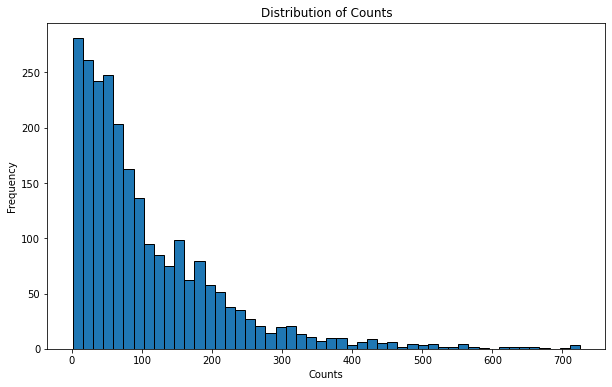

In [8]:
import matplotlib.pyplot as plt

# 기본 통계 요약
print(datewise_counts_non_empty.describe())

# 히스토그램
plt.figure(figsize=(10, 6))
datewise_counts_non_empty.hist(bins=50, edgecolor='black')
plt.title("Distribution of Counts")
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


### 일별 min 값 분포

In [9]:
# 상위 50개의 행을 가져옵니다.
top_n_min_values = datewise_counts_non_empty.nsmallest(100)

# 인덱스(date)가 주말인지 확인합니다.
is_weekend = top_n_min_values.index.weekday >= 5

# 결과를 출력합니다.
print(is_weekend)

# numpy 배열을 pandas Series로 변환
is_weekend_series = pd.Series(is_weekend)

# True와 False의 개수를 센다.
counts = is_weekend_series.value_counts()

print(counts)

[ True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False False  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True False False
 False False  True  True False False  True  True False False  True  True
  True  True  True  True]
True     82
False    18
dtype: int64


### 일별 max 값 분포

In [10]:
# 상위 50개의 행을 가져옵니다.
top_n_min_values = datewise_counts_non_empty.nlargest(100)

# 인덱스(date)가 주말인지 확인합니다.
is_weekend = top_n_min_values.index.weekday >= 5

# 결과를 출력합니다.
print(is_weekend)

# numpy 배열을 pandas Series로 변환
is_weekend_series = pd.Series(is_weekend)

# True와 False의 개수를 센다.
counts = is_weekend_series.value_counts()

print(counts)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
False    99
True      1
dtype: int64


In [11]:
# 가장 많은 카운트를 가진 날짜 추출
max_count_date = datewise_counts_non_empty.idxmax()
max_count_value = datewise_counts_non_empty[max_count_date]

max_count_date, max_count_value


# 가장 많은 카운트를 가진 날짜에 해당하는 행을 추출
max_count_rows = filtered_df.loc[filtered_df['date'] == max_count_date]


max_count_rows
# max_count_rows.to_csv('20180610_test.csv', encoding="UTF-8-sig", index=False)


,date,time,title,content,press,link,year
675454,2022-01-19,2022-01-19 09:23:01,"[코인뉴스] 비트코인, 바닥 친 거래량 6조원도 위태…‘춥다 추워’",\n얼어붙은 시장 분위기에 추가 시세하락 우려\n\n\n\n비트코인 관련 이미지.ⓒ...,데일리안언론사 선정,https://n.news.naver.com/mnews/article/119/000...,2022
675457,2022-01-19,2022-01-19 09:04:00,[코인시황]비트코인 5100만원대…미 연준 긴축정책 공포,\n\n\n\n\n[서울=뉴시스]이주혜 기자 = 비트코인이 5100만원대에 머물고 ...,뉴시스,https://n.news.naver.com/mnews/article/003/001...,2022
675459,2022-01-19,2022-01-19 09:15:25,"美 증시, 5중고에 `검은 화요일` 마진콜+단기금리 급등+B/S 축소+금융규제+실...",\n\t\t\t본격적인 어닝 시즌을 맞아 미 증시가 상승할 것이라 기대했던 서학 개...,한국경제TV,https://n.news.naver.com/mnews/article/215/000...,2022
675460,2022-01-19,2022-01-19 12:56:35,"李 ""가상자산 법제화"" vs 尹 ""5천만원 비과세""…불붙은 코인 전쟁","\n이재명·윤석열, 19일 나란히 암호화폐 공약 발표하며 표심잡기두 후보 모두 가상...",뉴스1언론사 선정,https://n.news.naver.com/mnews/article/421/000...,2022
675462,2022-01-19,2022-01-19 13:04:01,우리 집 공유기가 악성코드 유포? 국정원 “IoT 기기 위협에 노출”,"\n\n\n\n\n[디지털데일리 이종현기자] 글로벌 인터넷 공유기, 폐쇄회로(CC)...",디지털데일리,https://n.news.naver.com/mnews/article/138/000...,2022
...,...,...,...,...,...,...,...
676811,2022-01-19,2022-01-19 10:02:04,"AR·VR 앞세운 메타버스 폭풍, 블록체인 금융·경영 혁신을 주목하라!",\n2022년 디지털 트렌드 핵심 ‘탈중앙화’\n\n\n\n네이버가 출시한 메타버스...,주간동아언론사 선정,https://n.news.naver.com/mnews/article/037/000...,2022
676815,2022-01-19,2022-01-19 17:24:01,"이재명 ""카카오페이 먹튀 철저 조사""","\n""2030 표심 잡자""이재명 vs 윤석열, 주식·코인 공약매각차익에 골몰한 도덕...",A6면 1단,https://n.news.naver.com/mnews/article/015/000...,2022
676816,2022-01-19,2022-01-19 17:25:01,"윤석열 ""코인 과세는 기반 구축 뒤에""","\n""2030 표심 잡자""이재명 vs 윤석열, 주식·코인 공약디지털자산 法제정·진흥...",A6면 1단,https://n.news.naver.com/mnews/article/015/000...,2022
676820,2022-01-19,2022-01-19 08:24:03,"이재명, 4대 가상자산 거래소 대표 간담회… 경로당 회장단 지지선언도",\n\n\n\n\n이재명 더불어민주당 대선후보가 19일 4대 가상자산 거래소 대표와...,머니S언론사 선정,https://n.news.naver.com/mnews/article/417/000...,2022


In [59]:
max_count_rows['content'].iloc[600]

'\r\n텐센트·소니 이어 업계 3위 등극82조 인수… 업계 지각변동 예고메타버스 주도권 등 쟁탈전 가열\r\n\r\n\r\n\r\n마이크로소프트가 세계적인 게임 기업 \'액티비전 블리자드\'를 687억 달러(약 82조원)에 인수한다. 마이크로소프트 제공    MS(마이크로소프트)가 세계적인 게임 기업 \'액티비전 블리자드\'를 687억 달러(약 82조원)에 인수한다. 글로벌 IT(정보통신) 산업 역사상 최대 규모의 M&amp;A(인수합병)로, 게임 업계의 지각 변동이 예상된다.MS는 18일(미국 현지시간) 액티비전 블리자드를 687억달러에 전액 현금 인수한다고 발표했다. 인수가는 지난 14일 주가에서 45% 프리미엄을 붙인 주당 95달러로 책정했다. 블리자드 주가는 지난 14일 65.39달러에 마감했다.MS는 이날 인수 계획과 함께 게임 사업을 확장하고 메타버스 주도권 쟁탈전에 본격 참여하겠다는 구상을 밝혔다. MS 관계자는 "게임은 가장 크고 빠르게 성장하는 엔터테인먼트로, 블리자드는 게임 개발과 양방향 엔터테인먼트 콘텐츠 선두주자"라며 "이번 인수를 통해 모바일, PC, 콘솔, 클라우드 전반에 걸친 게임 사업을 가속화하고 메타버스의 토대를 쌓겠다"고 설명했다.MS는 이번 인수가 완료되면 매출 기준으로 텐센트, 소니에 이어 세계 3위 게임사로 등극한다. 블리자드는 스타크래프트를 포함해 \'디아블로\', \'콜 오브 듀티\', \'오버워치\', \'캔디 크러시 사가\' 등 세계적인 게임 IP(지식재산권)를 보유하고 있다. 블리자드의 게임들이 MS의 엑스박스에 합류할 경우 소니의 플레이스테이션을 뛰어넘는 강력한 시너지 효과가 기대된다. MS는 엑스박스 게임 패스에 블리자드의 게임을 출시해 포트폴리오를 확장하겠다고 밝혔다. 엑스박스 게임 패스는 월정액 구독 방식의 게임 서비스로 가입자가 2500만명에 이른다. MS는 이번 인수로 글로벌 e스포츠 자산과 1만명에 달하는 게임 개발인력도 확보한다. 필 스펜서 MS 게이밍 CEO(최고경영자)는 "전 세계 게임 플레이어

In [51]:
# 가장 많은 카운트를 가진 날짜 추출
max_count_date = datewise_counts_non_empty.idxmax()
max_count_value = datewise_counts_non_empty[max_count_date]

max_count_date, max_count_value


(Timestamp('2022-01-19 00:00:00'), 51)

In [59]:
test = filtered_df.loc[filtered_df['date'] == '2018-06-10']
len(test)

51

In [60]:
test.to_csv('test.csv', encoding='utf-8-sig', index=False)

## TF-IDF + 코사인 유사도

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('test.csv', index_col=0)

# TF-IDF 변환기를 초기화
tfidf_vectorizer = TfidfVectorizer()

# 기사의 내용을 벡터로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])

# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 코사인 유사도 행렬의 크기 확인
print(cosine_sim.shape)


(51, 51)


In [62]:
# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.0010214757783344028,
 1.0000000000000038,
 0.08332220902051186,
 0.026815785104675544,
 0.18063643870677099)

In [63]:
# 군집을 저장할 리스트 초기화
clusters = []

# 방문한 기사를 표시하기 위한 배열 초기화
visited = np.zeros(cosine_sim.shape[0], dtype=bool)

# 유사도 행렬을 순회하며 군집 생성
for i in range(cosine_sim.shape[0]):
    if not visited[i]:
        # 현재 기사와 유사도가 0.6보다 높은 기사를 찾는다.
        similar_articles = np.where(cosine_sim[i] > 0.6)[0]
        
        # 해당 기사들을 군집에 추가하고 방문 표시를 한다.
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기 (비어있는 군집을 건너뛴다)
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

# 각 군집에 포함된 기사의 제목을 저장할 딕셔너리 초기화
clustered_titles = {}

for idx, cluster in enumerate(clusters):
    # 군집 내의 기사 제목들을 리스트로 저장
    titles = data.iloc[cluster]['title'].tolist()
    clustered_titles[f"Cluster {idx + 1}"] = titles

# 첫 5개 군집의 제목을 출력하여 확인
for cluster, titles in list(clustered_titles.items())[:5]:
    print(f"{cluster} (Total: {len(titles)} articles):")
    for title in titles:
        print(f"  - {title}")
    print("\n" + "-"*50 + "\n")

Cluster 1 (Total: 1 articles):
  - 벤처스퀘어 "블록체인과 스타트업 주제 컨퍼런스 14일 개최"

--------------------------------------------------

Cluster 2 (Total: 1 articles):
  - 가상화폐거래소 자금세탁 차단한다

--------------------------------------------------

Cluster 3 (Total: 1 articles):
  - 잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출

--------------------------------------------------

Cluster 4 (Total: 1 articles):
  - 美 CFTC, 비트코인 시세 조작 수사 본격화

--------------------------------------------------

Cluster 5 (Total: 1 articles):
  - 비트코인 `고래` 1600명, 전체 시가총액 1/3 보유

--------------------------------------------------



In [64]:
filtered_data

,time,title,content,press,link,year
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018
5,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018
6,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
7,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018
8,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
9,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018


# KoNLPy 라이브러리 사용

In [143]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [129]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv', index_col=0)

# 형태소 분석기 초기화
okt = Okt()

# 기사의 내용을 형태소로 분석
data['tokenized_content'] = data['content'].apply(lambda x: ' '.join(okt.morphs(x)))

# TF-IDF 변환기를 초기화
tfidf_vectorizer = TfidfVectorizer()

# 형태소 분석된 내용을 벡터로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenized_content'])

# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value


(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [130]:
def display_clusters_with_titles(clustered_articles, data):
    for key, article_indices in clustered_articles.items():
        print(f"Cluster represented by Article Index {key}:\n")
        for idx in article_indices:
            title = data['title'].iloc[idx]
            content = data['content'].iloc[idx]
            print(f"Title: {title}\n")
            print(f"Content: {content}\n")
            print("="*50)
        print("\n\n")

# display_clusters_with_titles 함수를 사용하여 군집 내용과 제목 출력
# 여기서는 함수만 정의하였으므로 실제 실행 시에는 display_clusters_with_titles(clustered_articles, data)를 호출하면 됩니다.


In [140]:
print(data.index)

Index(['2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10', '2018-06-10',
       '2018-06-10'],
      dtype='object', name='date')


In [139]:
first_cluster_indices = clustered_articles_indices.get(0, [])
first_cluster_indices

['\r\n\t\t\t서울창업허브에서 10회 \'GSC\' 행사...비트코인 전도사 로저버 등 참석(지디넷코리아=방은주 기자)스타트업 전문 미디어이자 액셀러레이터인 벤처스퀘어(대표 명승은)는 블록체인 생태계와 스타트업의 미래를 진단하는 \'GSC(Global Startup Conference) in HUB\' 컨퍼런스를 오는 14일 서울 공덕동 서울창업허브에서 개최한다고 밝혔다. 이 행사에는 비트코인 전도사로 알려진 로저버(Roger Ver) 비트코인닷컴 CEO 등이 참석한다. \'GSC\'는 벤처스퀘어가 지난 2013년부터 매년 봄가을 2회씩 개최해온 대규모 민간 스타트업 컨퍼런스다. 이번 10회째 행사는 서울창업허브와 손잡고 \'GSC in HUB\'라는 명칭으로 열린다. 주제는 ‘블록체인과 스타트업’이다. 전 세계 블록체인 혁신 사례를 주제별로 나눠 조망한다. 국내 스타트업이 미래 블록체인 시장에 어떻게 접근해야 할지 알려주는 계기가 될 전망이다.\r\n\r\n\r\n\r\n벤처스퀘어가 \'블록체인과 스타트업\'을 주제로 GSC 컨퍼런스를 14일 서울 공덕동 서울창업허브에서 개최한다. 사진은 작년 행사 모습. 오전에는 로저버 비트코인닷컴 CEO가 \'암호화폐가 보여줄 분산경제의 미래\'를, 또 에너고랩스 COO 카이카이 양(KaiKai Yang)이 \'탈중앙화 자원 거래 블록체인 프로젝트\'를 주제로 각각 기조연설을 한다. 오후에는 분야별 사례 발표가 이어진다. 미국과 중국에서 금융과 기술 생태계를 연구하며 블록체인 가능성을 연구해온 이영달 동국대학교 경영학과 교수가 \'비즈니스 관점의 블록체인, 글로벌 동향 그리고 기회와 위험관리\'를 주제로 강연한다.또 네이든 썬(Nathan Sun) 큐바오 COO가 \'퀄컴DApp 개발의 특장점\'을 주제로, 나카노텟페이(Teppei Nakano) 남코인 대표가 \'AI와 블록체인을 결합한 의료 기술 혁신\'을 주제로, 이영환 W3C 블록체인커뮤니티그룹 의장이 \'블록체인 기술 국제 동향과 표준화\'를 주제로 각각 

In [148]:
def cluster_articles_by_similarity(cosine_sim, threshold=0.6):
    clusters = {}
    visited = set()

    for i in range(len(cosine_sim)):
        if i in visited:
            continue
        current_cluster = [i]
        for j in range(i+1, len(cosine_sim)):
            if cosine_sim[i][j] > threshold:
                current_cluster.append(j)
                visited.add(j)
        if len(current_cluster) > 1:
            clusters[i] = current_cluster
            
    return clusters

# 군집화 함수를 사용하여 군집 생성
clustered_articles_indices = cluster_articles_by_similarity(cosine_sim)

# display_clusters_with_titles 함수를 사용하여 군집 내용과 제목 출력
display_clusters_with_titles(clustered_articles_indices, data)


Cluster represented by Article Index 3:

Title: 美 CFTC, 비트코인 시세 조작 수사 본격화

Content: 
			[ 이현일 기자  ] 미 상품선물거래위원회(CFTC)가 가상화폐인 비트코인 시세 조작을 본격 조사하기 시작했다. 월스트리트저널(WSJ)은 CFTC가 최근 주요 가상화폐거래소에 거래 정보 공개 명령을 내렸다며 지난 8일 이같이 보도했다.이번 조치는 시카고상품거래소(CME)의 비트코인 선물가격 조작 관련 수사에서 비롯됐다. 당초 CME는 가상화폐거래소에 금융 사기 방지 등을 위해 거래 정보를 요구했지만, 거래소들은 특정 시간·일부 시장 참가자의 거래 정보만 제공했다. CFTC는 거래소의 정보 공개 거부가 가상화폐시장의 위험성을 조장한다고 판단한 것으로 분석된다. CFTC는 ‘스푸핑(spoofing)’이라는 가상화폐 가격 조작 행위를 눈여겨보는 것으로 알려졌다. 대량의 허위 매수·매도 주문(자전거래 등)을 내서 일반 투자자들이 가상화폐 가격이 오를 것으로 착각하게 만든 뒤 높은 가격에 가상화폐를 팔아넘기는 행위다.가상화폐거래소는 비트코인 가격 조작 행위는 없다고 해명했다. 제스 파월 크라켄 최고경영자(CEO)는 “가격 조작 행위는 거의 수익을 볼 수 없는 일에 엄청난 리스크를 떠안고 뛰어드는 일”이라고 반발했다.이현일 기자 hiuneal@hankyung.com[한경닷컴 바로가기] [글방] [모바일한경 구독신청] ⓒ 한국경제 &amp; hankyung.com, 무단전재 및 재배포 금지
		

Title: 美, 비트코인 선물 가격 조작 혐의 수사 나서

Content: 
CFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해  규제비트코인·이더리움 가격 하락



[서울경제] 미국 연방정부가 비트코인 선물 가격 조작 혐의를 들어 가상화폐 거래소에 정보 공개를 명령한 것으로 알려졌다. 강력한 규제조치에 비트코인·이더리움 등 가상화폐 가격은 일제히 하락했다.월스트리트저널(WSJ)은 미 상품선물거래위원회

In [116]:
# 군집화된 결과를 저장할 DataFrame 초기화
clustered_df = pd.DataFrame(columns=['Cluster_Representative', 'Title', 'Content'])

# 각 군집의 정보를 DataFrame에 추가
for key, article_indices in clustered_articles_indices.items():
    for idx in article_indices:
        title = data['title'].iloc[idx]
        content = data['content'].iloc[idx]
        clustered_df = clustered_df.append({
            'Cluster_Representative': key,
            'Title': title,
            'Content': content
        }, ignore_index=True)

# DataFrame을 CSV 파일로 저장
csv_path = "cluster_test.csv"
clustered_df.to_csv(csv_path, index=False, encoding='utf-8-sig')


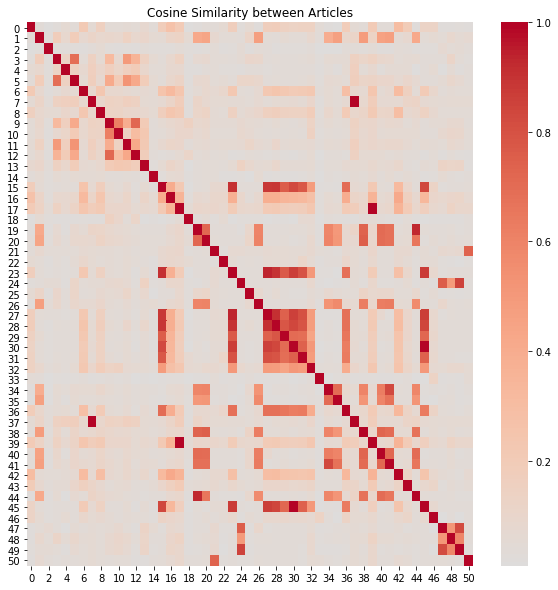

In [146]:
# 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 코사인 유사도 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_sim, cmap='coolwarm', center=0)
plt.title("Cosine Similarity between Articles")
plt.show()

In [78]:
# 군집화
clusters = []
visited = np.zeros(cosine_sim.shape[0], dtype=bool)
for i in range(cosine_sim.shape[0]):
    if not visited[i]:
        similar_articles = np.where(cosine_sim[i] > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)
filtered_data

,time,title,content,press,link,year,tokenized_content
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018,\r\n\t\t\t 서 울 창업 허브 에서 10회 ' GSC ' 행사 ... 비트코...
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018,"\r\n FIU , 직접 감독 대상 에 포함 대부 업체 도 돈세탁 고리 차단 … 변..."
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018,\r\n\r\n\r\n\r\n\r\n 올해 초 기승 을 부린 뒤 자취 를 감췄던 매...
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018,\r\n\t\t\t [ 이현일 기자 ] 미 상품 선물거래 위원회 ( CFTC ) 가...
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018,\r\n\t\t\t 가상 화폐 의 ' 큰손 ' 을 뜻 하는 소수 의 ' 고래 ( w...
5,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"\r\n 디지털 시민권 에 블록 체인 적용 … 中 대학생 , 이 더 리움 으로 ' ..."
6,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018,\r\n\t\t\t 암호 화폐 시장 규제 가 좀 더 확실해지면 기관 투자가 자금 ...
7,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,\r\n [ 박영숙 의 미래 여행 ] \r\n\r\n\r\n\r\n ( 서울 = 뉴...
8,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,\r\n\r\n\r\n\r\n\r\n WSJ 갈무리 ( 서울 = 뉴스 1 ) 박 형...
9,2018-06-10 11:43:12,"美규제당국, 가상통화 가격조작 조사 속도‥시장 영향은?","\r\n미 상품선물거래위원회, 비트코인 거래소에 거래정보 제공 요구\r\n\r\n\...",아시아경제,https://n.news.naver.com/mnews/article/277/000...,2018,"\r\n 미 상품 선물거래 위원회 , 비트코인 거래소 에 거래 정보 제공 요구 \r..."


In [72]:
filtered_data.to_csv('filtered_test.csv', encoding='utf-8-sig', index=False)

In [ ]:
filtered_data

## 자카드 유사도

In [79]:
import pandas as pd
from konlpy.tag import Okt
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv', index_col=0)


# 형태소 분석기 초기화
okt = Okt()

# 기사의 내용을 형태소로 분석하여 집합으로 변환
data['tokenized_content'] = data['content'].apply(lambda x: set(okt.morphs(x)))

def jaccard_similarity(set1, set2):
    """자카드 유사도 계산 함수"""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        # 자카드 유사도 계산
        similarity = jaccard_similarity(data['tokenized_content'].iloc[i], data['tokenized_content'].iloc[j])
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value


(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [81]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)


filtered_data


,time,title,content,press,link,year,tokenized_content
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018,"{서, 벤, 다, ', 시장, 이영환, 등, 3, 등록, 채널, 탈, 스케, 기술,..."
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018,"{다, 기준, ', 충분한, 등, 회의, 않던, 후속, 자금세탁, 수행, 상태, 입..."
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018,"{서, 다, 진행, 무차별, 등, 작동, 내, 크랩, 일으킬, 바로가기, 보기, 폴..."
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018,"{다, 시장, 등, 투자자, 정보, 들, )’, 이번, 바로가기, 월스트리트저널, ..."
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018,"{다, 기준, ', 시장, 부의, 탈, 투자자, 내, 들, 8000억원, 에서, 많..."
5,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018,"{서, 다, 기준, 시장, 등, 내부, 안고, 잇, 투자자, 엄단, 정보, 내린, ..."
6,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{다, 내, 계좌, 때아닌, 범죄, 사는, 3300만, …, 한화, 자본, 세계, ..."
7,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018,"{서, 시장, ', 등, 투자자, 자금세탁, 스케, 들, 기술, 모두, 에서, 수탁..."
8,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{벤, 다, Central, 짧은, 내, 계좌, 단단히, 자동, Masventas,..."
9,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{다, 직무, 기준, 출범, 채널, 등, 박, 잇, 현물, 내, 들, 정식, 이번,..."


## sBERT 사용

In [49]:
pip install sentence-transformers torch

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=212b513888f08fd38a4d0678afaacb36d7c88116e1783e1239c2e41085dfab74
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5e\6f\8c\d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

selenium 4.11.2 requires urllib3[socks]<3,>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
huggingface-hub 0.17.2 requires packaging>=20.9, but you'll have packaging 20.4 which is incompatible.


In [86]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv')

# sBERT 모델 로드
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

# 각 기사의 내용을 임베딩
embeddings = model.encode(data['content'].tolist(), convert_to_tensor=True)

# 코사인 유사도 계산 함수
def cosine_similarity(embedding1, embedding2):
    return util.pytorch_cos_sim(embedding1, embedding2)

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        similarity = cosine_similarity(embeddings[i], embeddings[j]).item()
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [87]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)
filtered_data

,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018
4,2018-06-10,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
5,2018-06-10,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
6,2018-06-10,2018-06-10 11:55:00,[이주의 비트코인]'51% 공격'에 가격 '뚝'…잡코인 옥석가리기,"\r\n'51% 공격' 당한 가상통화 가격, 계단식 하락 계속 거래소, 기반 취약한...",아시아경제,https://n.news.naver.com/mnews/article/277/000...,2018
7,2018-06-10,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
8,2018-06-10,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018
9,2018-06-10,2018-06-10 17:11:03,"[인터뷰] 정기욱 트러스트버스 대표 ""사기성 ICO 막으려면 규제 샌드박스 필요...",\r\n암호화폐공개 시장 규제 필요성 강조현재 ICO의 90% 이상이 비정상자격 갖...,35면 TOP,https://n.news.naver.com/mnews/article/011/000...,2018


## Levenshtein

In [89]:
import pandas as pd
import numpy as npa
import Levenshtein as lev

# 데이터 로드
data = pd.read_csv('test.csv')

# Restricted Damerau-Levenshtein 거리 계산 함수
def restricted_damerau_levenshtein(str1, str2):
    return lev.distance(str1, str2)

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        # Restricted Damerau-Levenshtein 거리 계산
        distance = restricted_damerau_levenshtein(data['content'].iloc[i], data['content'].iloc[j])
        # 유사도는 1에서 거리를 뺀 값으로 계산 (거리가 0이면 완벽하게 일치)
        similarity = 1 - (distance / max(len(data['content'].iloc[i]), len(data['content'].iloc[j])))
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [91]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

filtered_data


,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
4,2018-06-10,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018
5,2018-06-10,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018
6,2018-06-10,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
7,2018-06-10,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018
8,2018-06-10,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
9,2018-06-10,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018


In [67]:
filtered_data

,date,time,title,content,press,link,year
0,2022-01-19,2022-01-19 09:23:01,"[코인뉴스] 비트코인, 바닥 친 거래량 6조원도 위태…‘춥다 추워’",\n얼어붙은 시장 분위기에 추가 시세하락 우려\n\n\n\n비트코인 관련 이미지.ⓒ...,데일리안언론사 선정,https://n.news.naver.com/mnews/article/119/000...,2022
1,2022-01-19,2022-01-19 09:04:00,[코인시황]비트코인 5100만원대…미 연준 긴축정책 공포,\n\n\n\n\n[서울=뉴시스]이주혜 기자 = 비트코인이 5100만원대에 머물고 ...,뉴시스,https://n.news.naver.com/mnews/article/003/001...,2022
2,2022-01-19,2022-01-19 09:15:25,"美 증시, 5중고에 `검은 화요일` 마진콜+단기금리 급등+B/S 축소+금융규제+실...",\n\t\t\t본격적인 어닝 시즌을 맞아 미 증시가 상승할 것이라 기대했던 서학 개...,한국경제TV,https://n.news.naver.com/mnews/article/215/000...,2022
3,2022-01-19,2022-01-19 12:56:35,"李 ""가상자산 법제화"" vs 尹 ""5천만원 비과세""…불붙은 코인 전쟁","\n이재명·윤석열, 19일 나란히 암호화폐 공약 발표하며 표심잡기두 후보 모두 가상...",뉴스1언론사 선정,https://n.news.naver.com/mnews/article/421/000...,2022
4,2022-01-19,2022-01-19 13:04:01,우리 집 공유기가 악성코드 유포? 국정원 “IoT 기기 위협에 노출”,"\n\n\n\n\n[디지털데일리 이종현기자] 글로벌 인터넷 공유기, 폐쇄회로(CC)...",디지털데일리,https://n.news.naver.com/mnews/article/138/000...,2022
...,...,...,...,...,...,...,...
377,2022-01-19,2022-01-19 16:02:08,비밀번호 관리 취약한 IoT 노린 조직 범죄,\n\n\n\n\nMozi봇넷은 미라이(Mirai)를 기반으로 한 사물인터넷(IoT...,17면 3단,https://n.news.naver.com/mnews/article/030/000...,2022
378,2022-01-19,2022-01-19 17:35:02,CCTV·공유기 1만대 털렸다…사물인터넷 무방비 노출,\n연초부터 해커 타깃된 IoTDDoS 공격 위한 '모지봇넷'전세계 72개국서 감염...,A2면 TOP,https://n.news.naver.com/mnews/article/009/000...,2022
379,2022-01-19,2022-01-19 16:57:03,끝없는 악재 쓰나미에…1월 증시 '휘청',\n美긴축·'오스템 횡령' 엎친데카카오페이 먹튀 논란도 불거져신라젠 상폐로 투자심리...,A22면 1단,https://n.news.naver.com/mnews/article/015/000...,2022
380,2022-01-19,2022-01-19 19:18:06,공공기관 사용 IoT장비 100여대 악성코드 감염,\n\n\n\n\n국가정보원 원훈석. 국가정보원 제공 국가기관·공공기관에서 사...,1면 1단,https://n.news.naver.com/mnews/article/029/000...,2022


## DBSCAN

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드
data = pd.read_csv('test.csv')

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['content'])

# 코사인 유사도를 기반으로 DBSCAN 클러스터링
# min_samples는 각 군집에 필요한 최소 샘플 수입니다.
# 이 값을 2로 설정하면 최소 두 개의 유사한 기사가 있어야 군집을 형성합니다.
dbscan = DBSCAN(eps=0.4, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(tfidf_matrix)

# 각 군집에서 대표 기사 선택
unique_clusters = set(clusters)
representative_indices = []

for cluster in unique_clusters:
    if cluster != -1:  # -1은 노이즈 포인트를 나타냅니다.
        indices = [index for index, value in enumerate(clusters) if value == cluster]
        representative_indices.append(indices[0])

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

print(filtered_data)


         date                 time                             title  \
0  2018-06-10  2018-06-10 12:46:04  월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”   
1  2018-06-10  2018-06-10 10:48:07     LG CNS, 조폐공사 블록체인 플랫폼 구축사업 수주   
2  2018-06-10  2018-06-10 07:01:05     가상화폐 '제도화' 뛰어든 해외, 기준조차 없는 한국   
3  2018-06-10  2018-06-10 12:01:05       암호화폐 취급업소 AML 체계 감독대상에 포함된다   
4  2018-06-10  2018-06-10 13:26:03   거래소 코인레일, 해킹공격 발생으로 '긴급 시스템 점검'   
5  2018-06-10  2018-06-10 14:01:10   전자금융업·대부업·변호사에 ‘돈세탁방지 의무’ 부과 검토   

                                             content       press  \
0  \r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...      파이낸셜뉴스   
1  \r\n\t\t\t&lt;아이뉴스24&gt;[아이뉴스24 성지은 기자] LG CNS...      아이뉴스24   
2  \r\n"블록체인-가상화폐 분리불가…'베니스의 상인'과 유사""정부는 규제라도 해달...  한국경제언론사 선정   
3  \r\n\t\t\t 금융당국이 암호화폐 취급업소를 자금세탁방지(AML) 체계 감독대...      파이낸셜뉴스   
4  \r\n펀디엑스(NPXP) 해킹공격 시도로 시스템 점검 나서"10일 오전 2시부터 ...        서울경제   
5  \n\n\n\n\n 정부가 가상통화 취급업소를 자금세탁방지 체계의 직접적인 감독대상...         KBS   

                  

In [39]:
# 클러스터별 기사들 출력
for cluster in unique_clusters:
    if cluster != -1:  # -1은 노이즈 포인트를 나타냅니다.
        print(f"Cluster {cluster}:")
        indices = [index for index, value in enumerate(unique_clusters) if value == cluster]
        
        for idx in indices:
            print(f"Title: {data['title'].iloc[idx]}")
            print(f"Content: {data['content'].iloc[idx]}")
            print("-" * 50)
        
        print("=" * 100)


Cluster 0:
Title: [코인뉴스] 비트코인, 바닥 친 거래량 6조원도 위태…‘춥다 추워’
Content: 
얼어붙은 시장 분위기에 추가 시세하락 우려



비트코인 관련 이미지.ⓒ픽사베이[데일리안 = 이건엄 기자] 비트코인 거래량이 급격히 줄어들며 시장 전반이 얼어붙은 모양새다. 시세 하락이 거듭되고 있는 상황에서 유동성마저 경직되다 보니 투자자들의 불안감도 함께 고조되고 있다.19일 암호화폐 분석 플랫폼 크립토컴페어에 따르면 18일(현지시간) 기준 글로벌 일 비트코인 거래량은 52억달러(한화 약 6조원)로 전주(75억달러) 대비 30.7% 급감했다. 이는 전날(58억달러)과 비교하더라도 10.3% 줄어든 수치다.문제는 거래량이 지속적으로 줄고 있다는 점이다. 실제 글로벌 비트코인 거래량은 지난 12일 75억달러를 기록한 이후 일주일 간 단 한 번의 반등도 없이 우하향 그래프를 그리고 있다. 금리 인상과 각국의 긴축 정책 여파로 불안감을 느낀 비트코인 투자자들이 지속해서 빠져나가고 있는 것을 알 수 있는 대목이다.실제 골드만삭스는 중앙은행이 지속적인 인플레이션에 맞서기 위해 올해 최소 4번의 금리를 인상할 것으로 예상하고 있다. 제이미 다이먼 JP모건 최고경영자(CEO)도 연준이 금리를 최대 7번까지 인상할 수 있을 것으로 보고 있다.특히 시세 역시 5000만원대 초반에 머물며 약세장을 지속하다 보니 떨어진 유동성에 추가 하락에 대한 우려가 커지고 있다.한편 암호화폐 거래소 업비트에 따르면 이날 오전 9시 10분 기준 1비트코인은 5116만3000원에 거래되고 있다. 빗썸에서는 5108만3000원을 기록 중이다. 이더리움은 같은시간 빗썸에서 381만4000원에 거래되고 있다. 빗썸에서도 381만3000원을 기록 중이다.암호화폐는 주식과 달리 거래소 단위로 거래 가격이 매겨지기 때문에 같은 종류의 암호화폐라도 거래소에 따라 가격에 다소 차이가 있다.
		
--------------------------------------------------
Clu

In [43]:
# 각 클러스터의 크기 계산
cluster_sizes = {cluster: sum(unique_clusters == cluster) for cluster in unique_clusters if cluster != -1}

# 가장 큰 클러스터 찾기
largest_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 가장 큰 클러스터에 속한 기사 내용 출력
print(f"Largest Cluster {largest_cluster}:\n")
indices = [index for index, value in enumerate(unique_clusters) if value == largest_cluster]

for idx in indices:
    print(f"Title: {data['title'].iloc[idx]}")
    print(f"Content: {data['content'].iloc[idx]}")
    print("-" * 50)


TypeError: 'numpy.bool_' object is not iterable